In [1]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sentence_transformers import SentenceTransformer
from transformers import BertForSequenceClassification, BertTokenizer
import torch
import numpy as np
import time
from cleantext import clean
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [2]:
with open('subtopics_dict.pickle', 'rb') as handle:
    word_could_dict = pickle.load(handle)

In [3]:
len(word_could_dict)

1000

In [4]:
word_dict = dict(filter(lambda elem: elem[1] > 10, word_could_dict.items()))

In [5]:
len(word_dict)

148

In [35]:
word_dict

{'Components': 50,
 'Platforms': 36,
 'Criticism': 172,
 'Version_history': 60,
 'History': 2038,
 'Features': 473,
 'Hardware': 56,
 'Development': 130,
 'Security_and_privacy': 14,
 'Reception': 362,
 'Devices': 12,
 'Architecture': 63,
 'Release_history': 79,
 'Usage': 100,
 'Functionality': 27,
 'Implementation': 92,
 'Background': 103,
 'Personal_life': 109,
 'Honors_and_awards': 11,
 'In_popular_culture': 69,
 'Products': 36,
 'Corporate_affairs': 24,
 'Criticism_and_controversies': 15,
 'Releases': 31,
 'Production': 30,
 'Models': 27,
 'Software': 77,
 'Books': 19,
 'File_format': 12,
 'Cultural_impact': 12,
 'Early_life': 54,
 'Career': 95,
 'Philanthropy': 16,
 'Early_life_and_education': 61,
 'Awards_and_honors': 15,
 'Changes': 12,
 'System_requirements': 36,
 'Specifications': 39,
 'Issues': 23,
 'Timeline': 58,
 'Controversies': 89,
 'Overview': 345,
 'Design': 133,
 'Gallery': 24,
 'Problems': 26,
 'Variants': 51,
 'Controversy': 32,
 'Purpose': 25,
 'Security': 128,
 'S

In [37]:
with open('word_dict.pickle', 'wb') as handle:
    pickle.dump(word_dict, handle)

In [6]:
subtopics = list(word_dict.keys())

In [7]:
cleaned_subtopics = []
for topics in subtopics:
    words = clean(re.sub(r'_', ' ', topics)).split(" ")
    
    stop_words = nltk.corpus.stopwords.words("english")
    text_filtered = [word for word in words if not word in stop_words]
    stemmer = WordNetLemmatizer()
    text_stemmed = ' '.join([stemmer.lemmatize(y) for y in text_filtered])
    
    
    cleaned_subtopics.append(text_stemmed)

In [8]:
start = time.time()
model = SentenceTransformer('sentence-transformers/all-roberta-large-v1')
print("Model initializaiton: ", time.time() - start)

Model initializaiton:  5.694300174713135


In [9]:
X = model.encode(cleaned_subtopics)

In [10]:
X.shape

(148, 1024)

In [11]:
X[0]

array([-0.02529274,  0.00576949,  0.00294342, ...,  0.01643118,
        0.02116345,  0.00462527], dtype=float32)

In [22]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=10, verbose=1, tol=1e-03, random_state=0)
model.fit(X)

Initialization complete
Iteration 0, inertia 159.89971923828125
Iteration 1, inertia 93.31703186035156
Iteration 2, inertia 92.80369567871094
Iteration 3, inertia 92.36922454833984
Iteration 4, inertia 92.28401947021484
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 162.5223388671875
Iteration 1, inertia 92.68106842041016
Iteration 2, inertia 91.77313995361328
Iteration 3, inertia 91.39913177490234
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 152.90052795410156
Iteration 1, inertia 92.24486541748047
Iteration 2, inertia 92.15467071533203
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 153.9193572998047
Iteration 1, inertia 92.94029235839844
Iteration 2, inertia 92.39924621582031
Iteration 3, inertia 92.26142120361328
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 155.46424865722656
Iteration 1, inertia 93.424942

KMeans(max_iter=1000, n_clusters=10, random_state=0, tol=0.001, verbose=1)

In [23]:
labels = model.predict(X)

In [24]:
labels

array([8, 3, 1, 9, 1, 8, 5, 5, 5, 0, 5, 5, 9, 6, 5, 2, 1, 1, 0, 4, 3, 2,
       7, 9, 5, 4, 5, 1, 6, 4, 1, 4, 1, 1, 0, 1, 6, 6, 3, 9, 4, 7, 5, 6,
       3, 6, 4, 2, 5, 6, 8, 1, 4, 1, 5, 6, 4, 6, 2, 8, 6, 5, 4, 2, 8, 6,
       5, 5, 2, 2, 2, 4, 2, 4, 5, 3, 3, 0, 3, 9, 6, 6, 8, 8, 1, 6, 2, 2,
       1, 3, 9, 5, 4, 5, 3, 7, 3, 5, 2, 2, 4, 5, 9, 1, 1, 5, 4, 3, 0, 1,
       5, 2, 2, 4, 1, 3, 5, 1, 3, 6, 8, 2, 5, 7, 1, 2, 1, 7, 7, 4, 1, 4,
       1, 6, 7, 1, 1, 5, 0, 1, 6, 1, 3, 1, 5, 2, 7, 2], dtype=int32)

In [25]:
from collections import defaultdict
clusters = defaultdict(list)

In [26]:
for idx, i in enumerate(labels):
    clusters[i].append(subtopics[idx])

In [27]:
clusters = list(clusters.values())

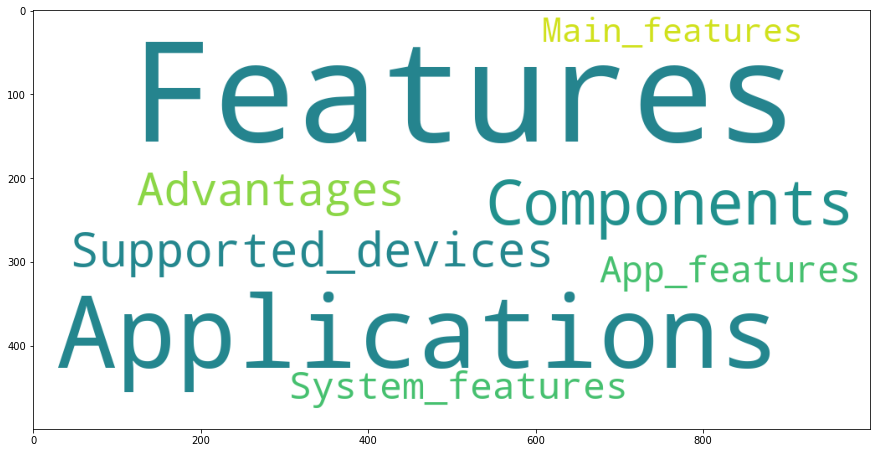

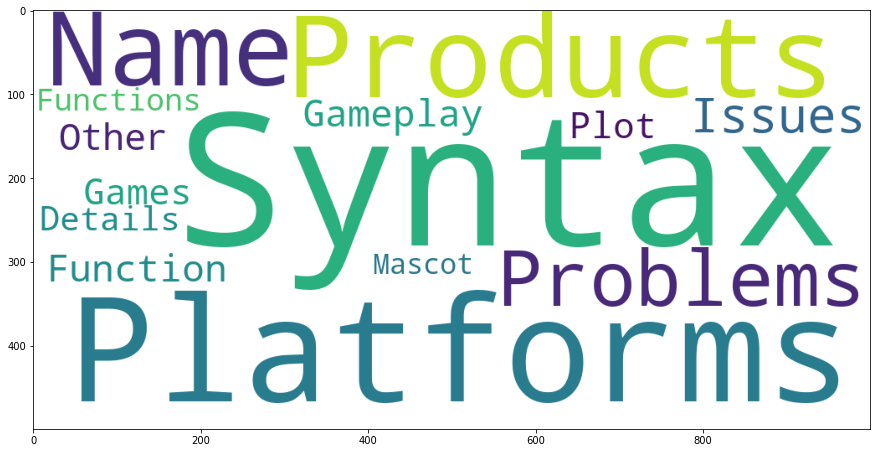

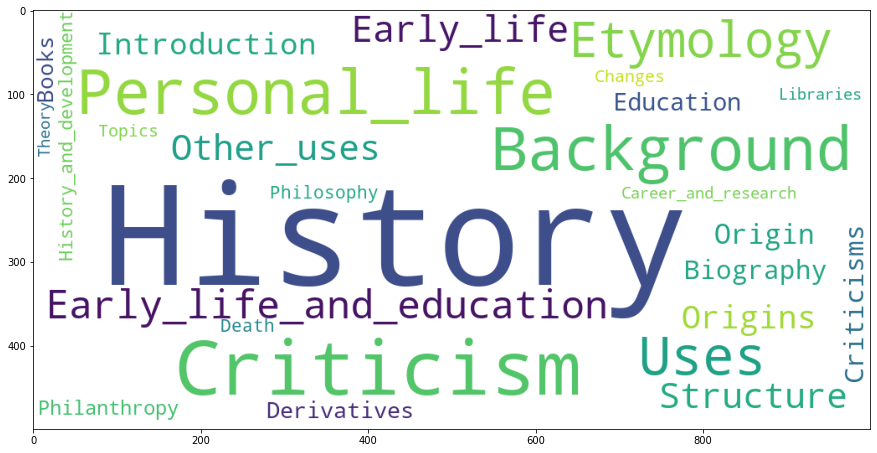

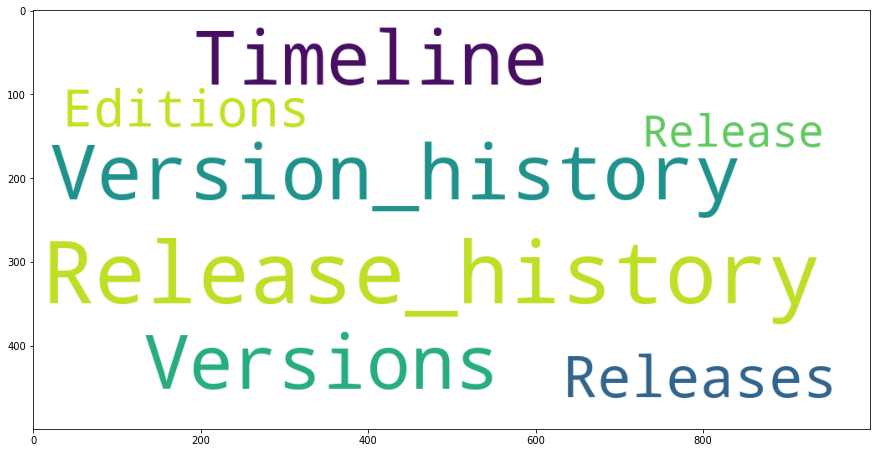

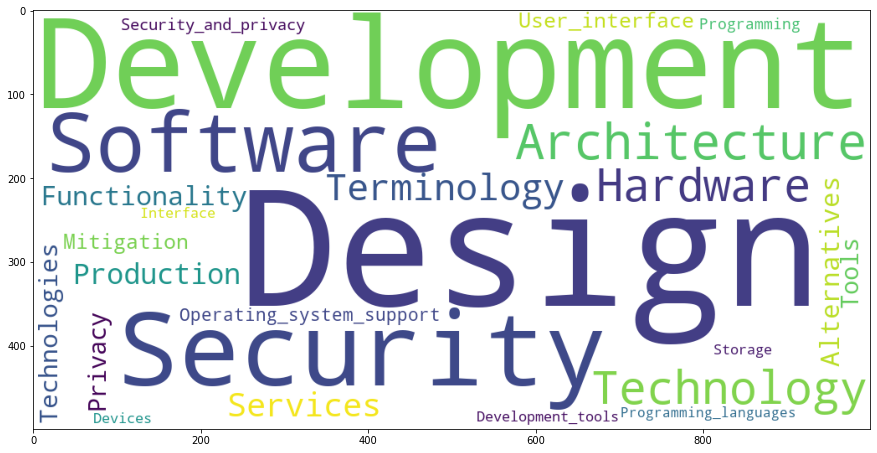

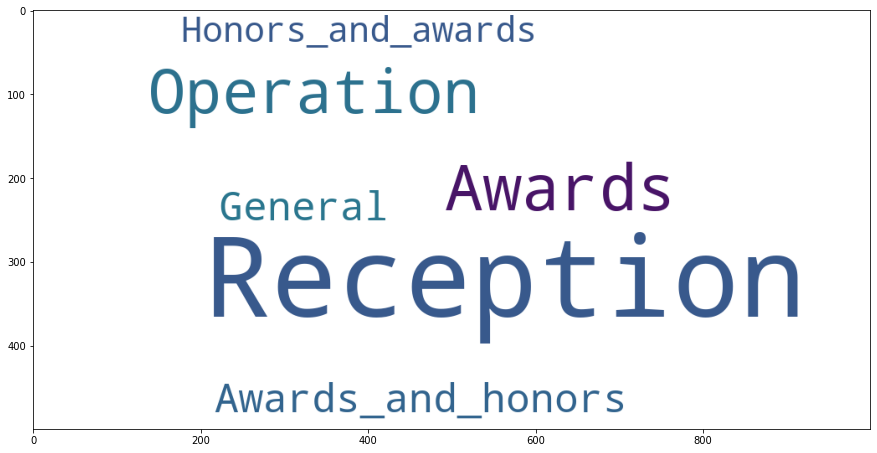

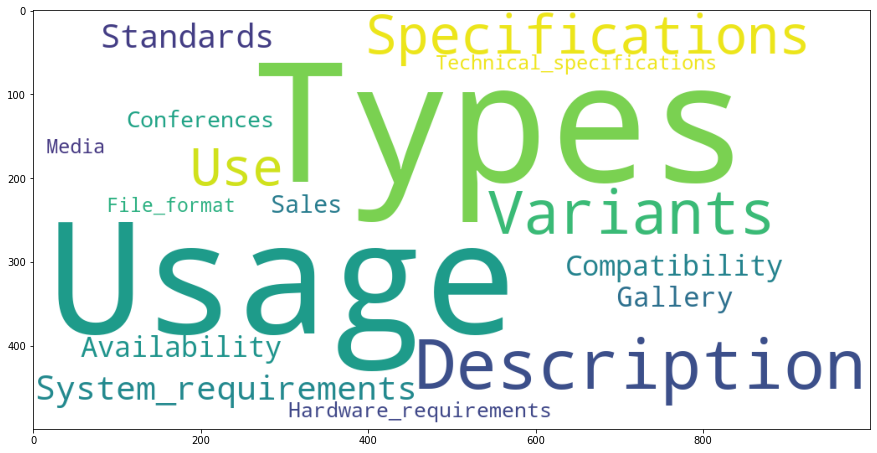

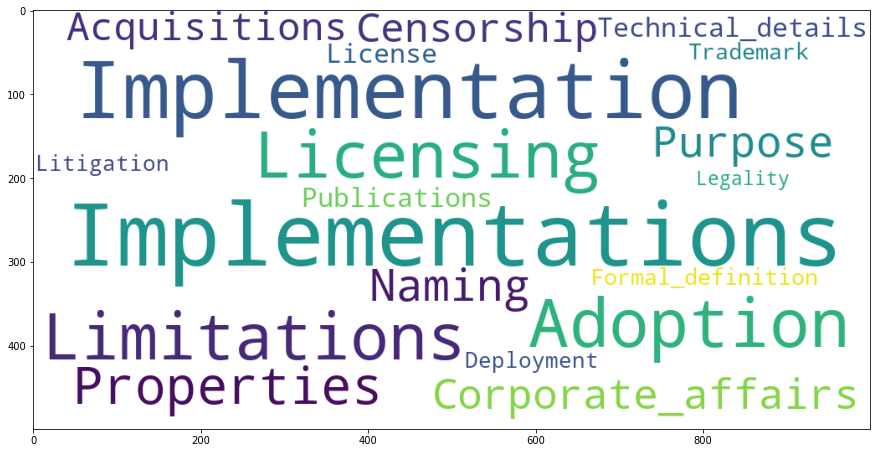

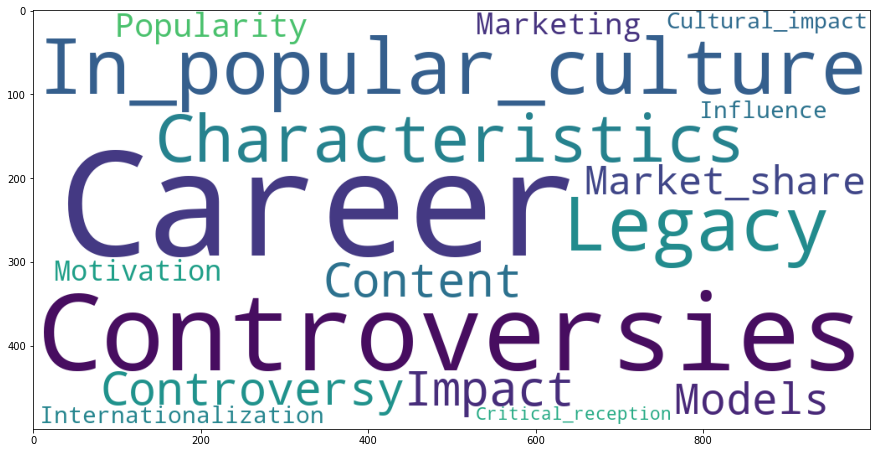

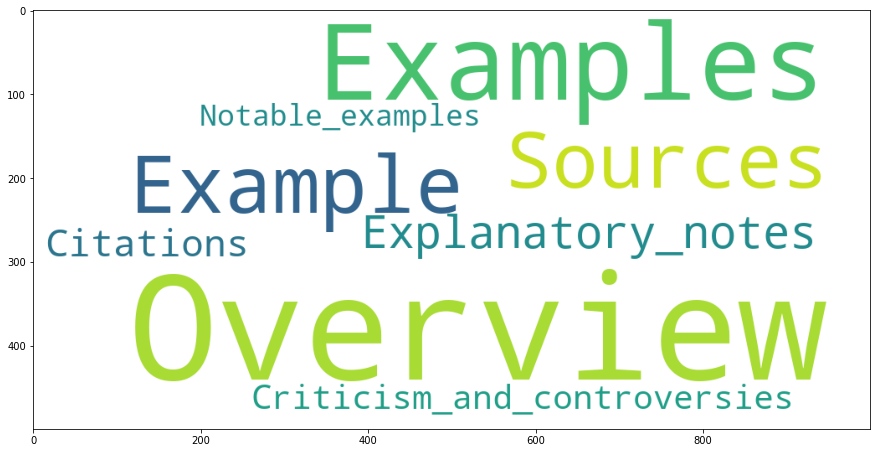

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for cluster in clusters:
    temp_dict = {}
    for topics in cluster:
        temp_dict[topics] = word_dict[topics]
    wordcloud = WordCloud(background_color="white", width = 1000, height = 500)\
    .generate_from_frequencies(temp_dict)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)


In [31]:
clusters_dict = {}

In [32]:
topic_names = ['Applications', 'Syntax', 'History', 'Versions', 'Design', 'Reception', 'Types', 'Implementation', 'Career', 'Overview']
for i, cluster in enumerate(clusters):
    clusters_dict[topic_names[i]] = cluster

In [33]:
clusters_dict

{'Applications': ['Components',
  'Features',
  'Applications',
  'Supported_devices',
  'Advantages',
  'System_features',
  'App_features',
  'Main_features'],
 'Syntax': ['Platforms',
  'Products',
  'Issues',
  'Problems',
  'Syntax',
  'Functions',
  'Gameplay',
  'Other',
  'Details',
  'Plot',
  'Function',
  'Games',
  'Name',
  'Mascot'],
 'History': ['Criticism',
  'History',
  'Background',
  'Personal_life',
  'Books',
  'Early_life',
  'Philanthropy',
  'Early_life_and_education',
  'Changes',
  'History_and_development',
  'Etymology',
  'Origins',
  'Origin',
  'Other_uses',
  'Introduction',
  'Criticisms',
  'Education',
  'Biography',
  'Death',
  'Philosophy',
  'Libraries',
  'Uses',
  'Structure',
  'Topics',
  'Theory',
  'Derivatives',
  'Career_and_research'],
 'Versions': ['Version_history',
  'Release_history',
  'Releases',
  'Timeline',
  'Release',
  'Editions',
  'Versions'],
 'Design': ['Hardware',
  'Development',
  'Security_and_privacy',
  'Devices',
 

In [38]:
with open('clusters.pickle', 'wb') as handle:
    pickle.dump(clusters_dict, handle)

In [20]:
# see if these subtopics co-occur in an article
# check the text similarity of the terms
# use the trained model for one topics and compare with the other within the cluster.

In [30]:
clusters

[['Components',
  'Features',
  'Applications',
  'Supported_devices',
  'Advantages',
  'System_features',
  'App_features',
  'Main_features'],
 ['Platforms',
  'Products',
  'Issues',
  'Problems',
  'Syntax',
  'Functions',
  'Gameplay',
  'Other',
  'Details',
  'Plot',
  'Function',
  'Games',
  'Name',
  'Mascot'],
 ['Criticism',
  'History',
  'Background',
  'Personal_life',
  'Books',
  'Early_life',
  'Philanthropy',
  'Early_life_and_education',
  'Changes',
  'History_and_development',
  'Etymology',
  'Origins',
  'Origin',
  'Other_uses',
  'Introduction',
  'Criticisms',
  'Education',
  'Biography',
  'Death',
  'Philosophy',
  'Libraries',
  'Uses',
  'Structure',
  'Topics',
  'Theory',
  'Derivatives',
  'Career_and_research'],
 ['Version_history',
  'Release_history',
  'Releases',
  'Timeline',
  'Release',
  'Editions',
  'Versions'],
 ['Hardware',
  'Development',
  'Security_and_privacy',
  'Devices',
  'Architecture',
  'Functionality',
  'Production',
  'Soft